# Sklearn Introduction

Classification, Regression, Clustering, Dimensionality reduction, Model selection, Preprocessing

![jupyter](./sklearn.jpg)

In [7]:
import sklearn
print( sklearn.__version__ )

0.22.2.post1


# SKlearn Data

## Data Form

在 Sklean 里，模型能即用的数据有两种形式：
1. Numpy 二维数组 (ndarray) 的稠密数据 (dense data)，通常都是这种格式。
2. SciPy 矩阵 (scipy.sparse.matrix) 的稀疏数据 (sparse data)，比如文本分析每个单词 (字典有 100000 个
词) 做独热编码得到矩阵有很多 0，这时用 ndarray 就不合适了，太耗内存。

上述数据在机器学习中通常用符号 X 表示，是模型自变量。它的大小 = [样本数, 特征数]。

## Self Data

In [1]:
# load data
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
n_samples, n_features = iris['data'].shape
print((n_samples, n_features))
print(iris.feature_names)
iris.data[0:5]

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
print(iris.target.shape)
print(iris.target_names)
iris.target

(150,)
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
import pandas as pd

iris_data = pd.DataFrame( iris.data, 
                          columns=iris.feature_names )
iris_data['species'] = iris.target_names[iris.target]
iris_data.head(3).append(iris_data.tail(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


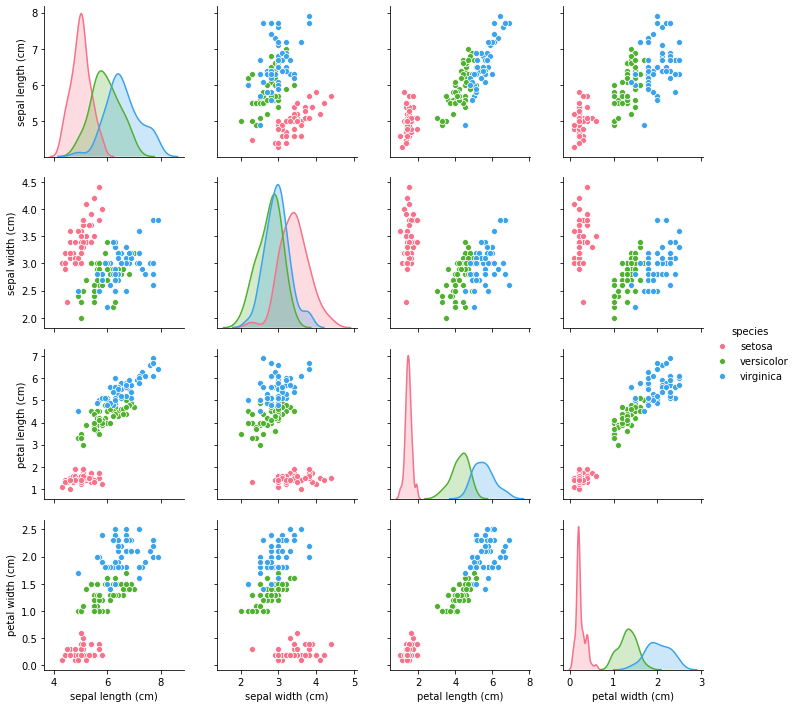

In [7]:
import seaborn as sns
sns.pairplot( iris_data, hue='species', palette='husl' );

1. 打包好的数据：对于小数据集，用 sklearn.datasets.load_*
2. 分流下载数据：对于大数据集，用 sklearn.datasets.fetch_*
3. 随机创建数据：为了快速展示，用 sklearn.datasets.make_*

In [11]:
from sklearn import datasets
#model = sklearn.linear_model.LinearRegression()

digits = datasets.load_digits()
digits.keys()

california_housing = datasets.fetch_california_housing()
california_housing.keys()

gaussian_quantiles = datasets.make_gaussian_quantiles() # 高斯分位数
type(gaussian_quantiles), len(gaussian_quantiles)

(tuple, 2)

# Sklearn API

Sklearn 里万物皆估计器。估计器是个非常抽象的叫法，可把它不严谨的当成一个模型 (用来回归、分类、聚
类、降维)，或当成一套流程 (预处理、网格最终)。
本节三大 API 其实都是估计器：
1. 估计器 (estimator) 当然是估计器
2. 预测器 (predictor) 是具有预测功能的估计器
3. 转换器 (transformer) 是具有转换功能的估计器

## Estimator 

fitter

任何可以基于数据集对一些参数进行估计的对象都被称为估计器。

两个核心点：1. 需要输入数据，2. 可以估计参数。估计器首先被创建，然后被拟合。

### Esitimator-Linear Regression

[2.]
1.0


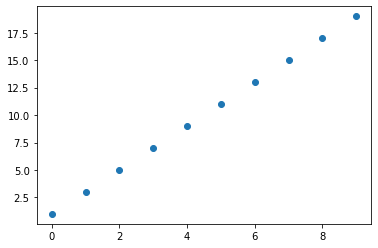

In [27]:
# Estimator--有监督（线性回归）
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

model = LinearRegression(normalize=True)
model

x = np.arange(10)
y = 2 * x + 1
plt.plot( x, y, 'o' );

X = x[:, np.newaxis]
model.fit( X, y )

print( model.coef_ )
print( model.intercept_ )

### Estimator-K-means

In [64]:
# Estimator--无监督（k-means）
from sklearn.cluster import KMeans

model = KMeans( n_clusters=3 )
model

X = iris.data[:,0:2]
model.fit(X)

print( model.cluster_centers_, '\n')
print( model.labels_, '\n' )
print( model.inertia_, '\n')
print( iris.target )

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]] 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0] 

37.05070212765958 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### colormap

In [19]:
# color
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

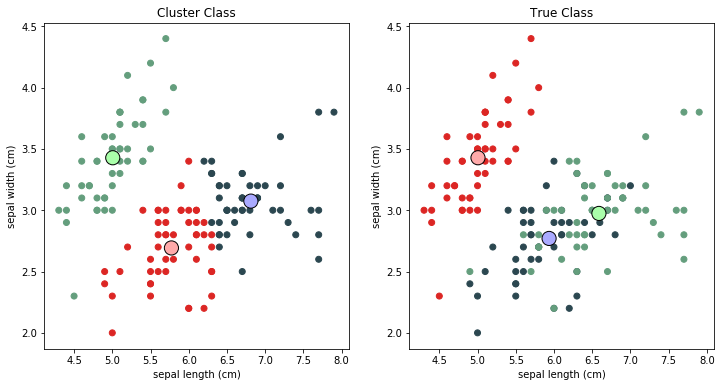

In [65]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap( ['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold1 = ListedColormap( [r_hex, g_hex, dt_hex])
cmap_bold2 = ListedColormap( [r_hex, dt_hex, g_hex])

centroid = model.cluster_centers_
label = iris.target
true_centroid = np.vstack((X[label == 0, :].mean(axis=0),
                          X[label == 1, :].mean(axis=0),
                          X[label == 2, :].mean(axis=0)))

plt.figure( figsize=(12,6) )

plt.subplot(1,2,1)
plt.scatter( X[:,0], X[:,1], c=model.labels_, cmap=cmap_bold1)
plt.scatter( centroid[:,0], centroid[:,1], marker='o', s=200, edgecolors='k', c=[0,1,2], cmap=cmap_light )
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Cluster Class')

plt.subplot(1,2,2)
plt.scatter( X[:,0], X[:,1], c=iris.target, cmap=cmap_bold2)
plt.scatter( true_centroid[:,0], true_centroid[:,1], marker='o', s=200, edgecolors='k', c=[0,2,1], cmap=cmap_light )
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('True Class')

plt.show()

## Predictor

定义：预测器在估计器上做了一个延展，延展出预测的功能。

两个核心点：1. 基于学到的参数预测，2. 预测有很多指标。最常见的就是 predict() 函数，此外还有predict_prob()、score()、decision_function()。

1. predict()：对于分类问题，预测的类别；
2. predict_proba()：对于分类问题，预测该类别的信心如何；
3. score() 返回的是分类准确率
4. decision_function() 返回的是每个样例在每个类下的分数值

In [3]:
# 所有变量都输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
a = 2
b = 1
b
a

1

2

### Train &. Test Split

In [8]:
# precitor

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( iris['data'],
                                                   iris['target'],
                                                   test_size=0.2 )

print( 'The size of X_train is ', X_train.shape )
print( 'The size of y_train is ', y_train.shape )
print( 'The size of X_test is ', X_test.shape )
print( 'The size of y_test is ', y_test.shape ) 



The size of X_train is  (120, 4)
The size of y_train is  (120,)
The size of X_test is  (30, 4)
The size of y_test is  (30,)


### Predictor-LogisticRegression

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression( solver='lbfgs', multi_class='multinomial' )
model.fit(X_train, y_train)

y_pred = model.predict( X_test )
p_pred = model.predict_proba( X_test )
print( y_test, '\n' )
print( y_pred, '\n' )
print( p_pred )

NameError: name 'X_train' is not defined

In [12]:
s = ['Class 1 Prob', 'Class 2 Prob', 'Class 3 Prob']
prob_DF = pd.DataFrame( p_pred, columns=s )
prob_DF['Predicted Class'] = y_pred
prob_DF['True Class'] = y_test
prob_DF.iloc[7:9,:]

,Class 1 Prob,Class 2 Prob,Class 3 Prob,Predicted Class,True Class
7,0.000967,0.433379,5.656536e-01,2,1
8,0.983000,0.017000,2.954322e-08,0,0


In [14]:
import numpy as np

print( model.score( X_test, y_test ) )    # accuracy
print( np.sum(y_pred==y_test)/len(y_test) )

decision_score = model.decision_function( X_test )
# print( decision_score )
s = ['Class 1 Score', 'Class 2 Score', 'Class 3 Score']
decision_DF = pd.DataFrame( decision_score, columns=s )
decision_DF['Predicted Class'] = y_pred
decision_DF.tail()

0.9333333333333333
0.9333333333333333


,Class 1 Score,Class 2 Score,Class 3 Score,Predicted Class
25,-1.140748,1.968452,-0.827704,1
26,-3.735532,2.216585,1.518947,1
27,6.673319,3.166066,-9.839385,0
28,1.478084,2.321713,-3.799797,1
29,-0.832309,1.827106,-0.994797,1


### Predictor-K-means

In [26]:
# Predicator-无监督（k-means）
from sklearn.cluster import KMeans

model = KMeans( n_clusters=3 )
model.fit(X_train[:,0:4])

# print( model.cluster_centers_, '\n')
# print( model.labels_, '\n' )
# print( model.inertia_, '\n')
# print( iris.target )

idx_pred = model.predict( X_test[:,0:4] )
print( idx_pred )
print( y_test )

[1 0 2 2 1 2 1 0 1 1 2 2 0 0 2 0 1 2 1 1 2 1 0 2 2 2 0 1 2 2]
[0 2 1 2 0 1 0 1 0 0 1 1 2 2 1 2 0 1 0 0 1 0 2 2 2 1 1 0 1 1]


In [25]:
X_train[0:3,:]

array([[5.9, 3. , 4.2, 1.5],
       [5.5, 2.5, 4. , 1.3],
       [4.9, 2.4, 3.3, 1. ]])

In [15]:
X_train

array([[5.9, 3. , 4.2, 1.5],
       [5.5, 2.5, 4. , 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [7.2, 3.6, 6.1, 2.5],
       [6. , 2.9, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [7.1, 3. , 5.9, 2.1],
       [6.5, 3.2, 5.1, 2. ],
       [5.4, 3. , 4.5, 1.5],
       [6.4, 2.9, 4.3, 1.3],
       [5.6, 2.5, 3.9, 1.1],
       [5.8, 2.7, 5.1, 1.9],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 3.4, 1.4, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.1, 3.5, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [7.2, 3. , 5.8, 1.6],
       [5. , 3.5, 1.3, 0.3],
       [6. , 2.2, 4. , 1. ],
       [6.8, 2.8, 4.8, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [4.6, 3.1, 1.5, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [4.8, 3. , 1.4, 0.3],
       [6.1, 3. , 4.6, 1.4],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3

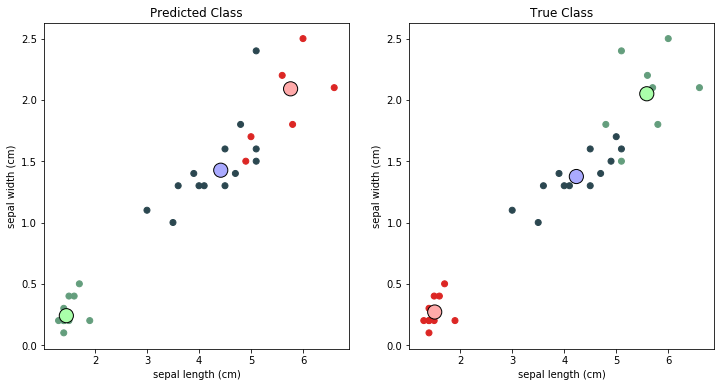

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

cmap_light = ListedColormap( ['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold1 = ListedColormap( [r_hex, g_hex, dt_hex])
cmap_bold2 = ListedColormap( [r_hex, dt_hex, g_hex])

centroid = model.cluster_centers_
true_centroid = np.vstack((X_test[y_test == 0, :].mean(axis=0),
                          X_test[y_test == 1, :].mean(axis=0),
                          X_test[y_test == 2, :].mean(axis=0)))

plt.figure( figsize=(12,6) )

plt.subplot(1,2,1)
plt.scatter( X_test[:,2], X_test[:,3], c=idx_pred, cmap=cmap_bold1)
plt.scatter( centroid[:,2], centroid[:,3], marker='o', s=200, edgecolors='k', c=[0,1,2], cmap=cmap_light )
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Predicted Class')

plt.subplot(1,2,2)
plt.scatter( X_test[:,2], X_test[:,3], c=y_test, cmap=cmap_bold2)
plt.scatter( true_centroid[:,2], true_centroid[:,3], marker='o', s=200, edgecolors='k', c=[0,2,1], cmap=cmap_light )
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('True Class')

plt.show()

## Transformer

定义：转换器也是一种估计器，两者都带拟合功能，但估计器做完拟合来预测，而转换器做完拟合来转换。

核心点：估计器里 fit + predict，转换器里 fit + transform。
本节介绍两大类转换器
1. 将分类型变量 (categorical) 编码成数值型变量 (numerical)
2. 规范化 (normalize) 或标准化 (standardize) 数值型变量

### Preprocessing (Encoder)

#### LabelEncoder, OrdinalEncoder

LabelEncoder 和 OrdinalEncoder 都可以将字符转成数字，但是
LabelEncoder 的输入是一维，比如 1d ndarray;
OrdinalEncoder 的输入是二维，比如 DataFrame。

In [6]:
# Transformer
enc = ['win','draw','lose','win']
dec = ['draw','draw','win']

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

print( LE.fit(enc) )
print( LE.classes_ )
print( LE.transform(dec) )

LabelEncoder()
['draw' 'lose' 'win']
[0 0 2]


In [8]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

enc_DF = pd.DataFrame(enc)
dec_DF = pd.DataFrame(dec)

print( OE.fit(enc_DF) )
print( OE.categories_ )
print( OE.transform(dec_DF) )

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)
[array(['draw', 'lose', 'win'], dtype=object)]
[[0.]
 [0.]
 [2.]]


#### OneHotEncoder

转换器 OneHotEncoder 可以接受两种类型的输入：
1. 用 LabelEncoder 编码好的一维数组
2. DataFrame

In [70]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

num = LE.fit_transform( enc )
print( num )
OHE_y = OHE.fit_transform( num.reshape(-1,1) )
OHE_y
OHE_y.toarray()

[2 0 1 2]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
enc_DF

,0
0,win
1,draw
2,lose
3,win


In [71]:
OHE = OneHotEncoder()
OHE.fit_transform( enc_DF ).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Preprocessing (normalize, standardize)

数据要做的最重要的转换之一是特征缩放 (feature scaling)。当输入的数值的量刚不同时，机器学习算法的性能都不会好。

具体来说，对于某个特征，我们有两种方法：

1. 标准化 (standardization)：每个维度的特征减去该特征均值，除以该维度的标准差。
2. 规范化 (normalization)：每个维度的特征减去该特征最小值，除以该特征的最大值与最小值之差。

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScalerb

X = np.array( [0, 0.5, 1, 1.5, 2, 100] )

# normalize (X-XMin)/XMax
X_norm = MinMaxScaler().fit_transform( X.reshape(-1,1) )
X_norm

# standardization (X-XMean)/XStd
X_stand = StandardScaler().fit_transform( X.reshape(-1,1) )
X_stand

array([[-0.47424487],
       [-0.46069502],
       [-0.44714517],
       [-0.43359531],
       [-0.42004546],
       [ 2.23572584]])

# Advanced API

Sklearn 里核心 API 接口是估计器，那高级 API 接口就是元估计器 (meta-estimator)，即由很多基估计器(base estimator) 组合成的估计器。

meta_model( base_model )

本节讨论五大元估计器，分别带集成功能的 ensemble，多分类和多标签的 multiclass，多输出的 multioutput，选择模型的 model_selection，和流水线的 pipeline。

1. ensemble.BaggingClassifier
2. ensemble.VotingClassifier
3. multiclass.OneVsOneClassifier
4. multiclass.OneVsRestClassifier
5. multioutput.MultiOutputClassifier
6. model_selection.GridSearchCV
7. model_selection.RandomizedSearchCV
8. pipeline.Pipeline

In [77]:
# Meta_Model
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split( iris['data'], iris['target'], test_size=0.2 )

4
RF - Accuracy (Train):  0.9917
RF - Accuracy (Test):  0.9333


## Ensemble

最常用的 Ensemble 估计器排列如下：
1. AdaBoostClassifier : 逐步提升分类器
2. AdaBoostRegressor : 逐步提升回归器
3. BaggingClassifier : 装袋分类器
4. BaggingRegressor : 装袋回归器
5. GradientBoostingClassifier : 梯度提升分类器
6. GradientBoostingRegressor : 梯度提升回归器
7. RandomForestClassifier : 随机森林分类器
8. RandomForestRegressor : 随机森林回归器
9. VotingClassifier : 投票分类器
10. VotingRegressor : 投票回归器

### RandomForest

In [ ]:
# Ensemble
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier( n_estimators=4, max_depth=5 )
RF.fit( X_train, y_train )

print( RF.n_estimators )
RF.estimators_

print ( "RF - Accuracy (Train):  %.4g" % 
        metrics.accuracy_score(y_train, RF.predict(X_train)) )
print ( "RF - Accuracy (Test):  %.4g" % 
        metrics.accuracy_score(y_test, RF.predict(X_test)) )

### VotingClassifier

In [82]:
# Ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

LR = LogisticRegression( solver='lbfgs', multi_class='multinomial' )
RF = RandomForestClassifier( n_estimators=5 )
GNB = GaussianNB()

Ensemble = VotingClassifier( estimators=[('lr',LR),('rf',RF),('gnb',GNB)], voting='hard' )
Ensemble.fit( X_train, y_train )

print( len(Ensemble.estimators_) )
Ensemble.estimators_

LR.fit( X_train, y_train )
RF.fit( X_train, y_train )
GNB.fit( X_train, y_train )

print ( "LR - Accuracy (Train):  %.4g" % metrics.accuracy_score(y_train, LR.predict(X_train)) )
print ( "RF - Accuracy (Train):  %.4g" % metrics.accuracy_score(y_train, RF.predict(X_train)) )
print ( "GNB - Accuracy (Train):  %.4g" % metrics.accuracy_score(y_train, GNB.predict(X_train)) )
print ( "Ensemble - Accuracy (Train):  %.4g" % metrics.accuracy_score(y_train, Ensemble.predict(X_train)) )
print ( "\n" )

print ( "LR - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, LR.predict(X_test)) )
print ( "RF - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, RF.predict(X_test)) )
print ( "GNB - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, GNB.predict(X_test)) )
print ( "Ensemble - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, Ensemble.predict(X_test)) )

3
LR - Accuracy (Train):  0.9833
RF - Accuracy (Train):  1
GNB - Accuracy (Train):  0.95
Ensemble - Accuracy (Train):  0.9833


LR - Accuracy (Test):  0.9667
RF - Accuracy (Test):  0.9333
GNB - Accuracy (Test):  0.9667
Ensemble - Accuracy (Test):  0.9667


## Multiclass

In [83]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

X_train, X_test, y_train, y_test = train_test_split( digits['data'], digits['target'], test_size=0.2 )

print( 'The size of X_train is ', X_train.shape )
print( 'The size of y_train is ', y_train.shape )
print( 'The size of X_test is ', X_test.shape )
print( 'The size of y_test is ', y_test.shape )


The size of X_train is  (1437, 64)
The size of y_train is  (1437,)
The size of X_test is  (360, 64)
The size of y_test is  (360,)


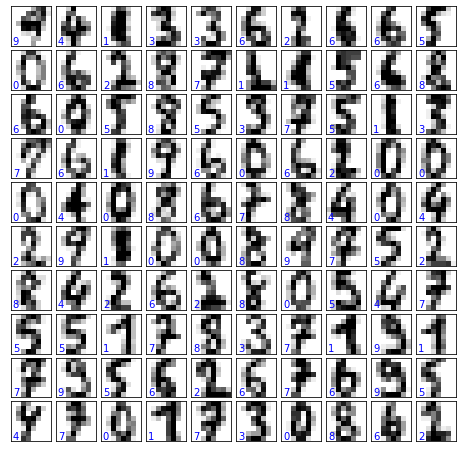

In [87]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots( 10, 10, figsize=(8,8) )
fig.subplots_adjust( hspace=0.1, wspace=0.1 )

for i, ax in enumerate( axes.flat ):
    ax.imshow( X_train[i,:].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text( 0.05, 0.05, str(y_train[i]), transform=ax.transAxes, color='blue' )
    ax.set_xticks([])
    ax.set_yticks([])

### multiclass
#### one v.s. one

In [93]:
# multiclass
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

ovo_lr = OneVsOneClassifier( LogisticRegression(solver='lbfgs', max_iter=200) )
ovo_lr.fit(X_train, y_train)

print( len(ovo_lr.estimators_) )
ovo_lr.estimators_

#print ( "OvO LR - Accuracy (Train):  %.4g" % metrics.accuracy_score(y_train, ovo_lr.predict(X_train)) )
#print ( "OvO LR - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, ovo_lr.predict(X_test)) )

45


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 Log

#### one v.s. all

In [91]:
# multiclass
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ova_lr = OneVsRestClassifier( LogisticRegression(solver='lbfgs', max_iter=800) )
ova_lr.fit(X_train, y_train)

print( len(ova_lr.estimators_) )
ovo_lr.estimators_

print ( "OvA LR - Accuracy (Train):  %.4g" % metrics.accuracy_score(y_train, ova_lr.predict(X_train)) )
print ( "OvA LR - Accuracy (Test):  %.4g" % metrics.accuracy_score(y_test, ova_lr.predict(X_test)) )

10
OvA LR - Accuracy (Train):  0.9993
OvA LR - Accuracy (Test):  0.9528


### multi-label

In [96]:
# multi-label classification (两个任务都是二分类)

from sklearn.multiclass import OneVsRestClassifier

# label_1:even, label_2:<=4
y_train_multilabel = np.c_[ y_train%2==0, y_train<=4 ]
print(y_train_multilabel)

ova_ml = OneVsRestClassifier( LogisticRegression(solver='lbfgs', max_iter=800) )
ova_ml.fit(X_train, y_train_multilabel)

print( len(ova_ml.estimators_) )
ova_ml.estimators_

[[False False]
 [ True  True]
 [False  True]
 ...
 [False False]
 [ True  True]
 [ True False]]
2


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=800,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=800,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)]

[2]
[[1 1]]


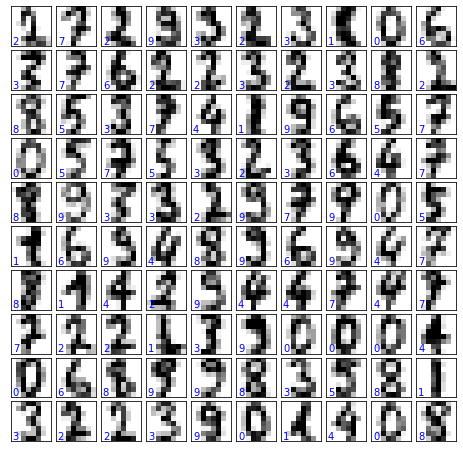

In [98]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots( 10, 10, figsize=(8,8) )
fig.subplots_adjust( hspace=0.1, wspace=0.1 )

for i, ax in enumerate( axes.flat ):
    ax.imshow( X_test[i,:].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text( 0.05, 0.05, str(y_test[i]), transform=ax.transAxes, color='blue' )
    ax.set_xticks([])
    ax.set_yticks([])
    

print( y_test[:1] )
print( ova_ml.predict(X_test[:1,:]) )

## Multioutput

In [100]:
# multioutput （两个任务都是多分类）
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

y_train_1st = y_train.copy()
y_train_1st[ y_train<=4 ] = 0
y_train_1st[ np.logical_and(y_train>4, y_train<7) ] = 1
y_train_1st[ y_train>=7 ] = 2

y_train_multioutput = np.c_[y_train_1st, y_train]
y_train_multioutput

MO = MultiOutputClassifier( RandomForestClassifier(n_estimators=100) )
MO.fit( X_train, y_train_multioutput )

MO.predict( X_test[:5,:] )

y_test_1st = y_test.copy()
y_test_1st[ y_test<=4 ] = 0
y_test_1st[ np.logical_and(y_test>4, y_test<7) ] = 1
y_test_1st[ y_test>=7 ] = 2
y_test_multioutput = np.c_[ y_test_1st, y_test ]
y_test_multioutput[:5]

array([[0, 2],
       [2, 7],
       [0, 2],
       [2, 9],
       [0, 3]])

In [102]:
MO.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)]

## Model Selection

模型选择 (Model Selction) 在机器学习非常重要，它主要用于评估模型表现，常见的 Model Selection 估计器有以下几个：

1. cross_validate : 评估交叉验证的表现。
2. learning_curve : 建立学习曲线。
3. GridSearchCV : 用交叉验证从网格中一组超参数搜索出最佳超参数。
4. RandomizedSearchCV : 用交叉验证从一组随机超参数搜索出最佳超参数。

本小节关注调节超参数的两个估计器，即上面列出的最后两个。它们都要用到交叉验证，先来了解一下这个知识点。

In [105]:
# Model Selection
from time import time
from scipy.stats import randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

X,y = digits.data, digits.target

RFC = RandomForestClassifier(n_estimators=20)

# randomized search
param_dist = {'max_depth': [3,5], 'max_features': randint(1,11), 'min_samples_split':randint(2,11), 'criterion':['gini','entropy']}
n_iter_search = 20
random_serach = RandomizedSearchCV( RFC, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

start = time()
random_serach.fit(X,y)
print('RandomizedSearchCV took %.2f seconds for %d candidates parameter settings.' % ((time()-start),n_iter_search))

print( random_serach.best_params_ )
print( random_serach.best_score_ )

# grid search
param_grid = {'max_depth': [3,5], 'max_features': [1,3,10], 'min_samples_split':[2,3,10], 'criterion':['gini','entropy']}
grid_serach = GridSearchCV( RFC, param_grid=param_grid, cv=5)
start = time()
grid_serach.fit(X,y)
print('\nGridSearchCV took %.2f seconds for %d candidates parameter settings.' % ((time()-start),len(grid_serach.cv_results_['params'])))

print( grid_serach.best_params_ )
print( grid_serach.best_score_ )



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV took 6.50 seconds for 20 candidates parameter settings.
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'min_samples_split': 4}
0.8853644963828603

GridSearchCV took 10.87 seconds for 36 candidates parameter settings.
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 10}
0.8881469115191987


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Pipeline

Pipeline 估计器又叫流水线，把各种估计器串联 (Pipeline) 或并联 (FeatureUnion) 的方式组成一条龙服务。用好了它真的能大大提高效率。

### Pipeline

Pipeline 将若干个估计器按顺序连在一起，比如

特征提取 -> 降维 -> 拟合 -> 预测

在整个 Pipeline 中，它的属性永远和最后一个估计器属性一样

1. 如果最后一个估计器是预测器，那么 Pipeline 是预测器
2. 如果最后一个估计器是转换器，那么 Pipeline 是转换器

In [107]:
# pipeline

X = np.array([[50, 40, 30, 5, 7, 10, 9, np.NaN, 12],
             [1.68, 1.83, 1.77, np.NaN, 1.9, 1.65, 1.88, np.NaN, 1.75]])
X = np.transpose(X)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

pipe = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('normalize', MinMaxScaler())
])

X_proc = pipe.fit_transform(X)

print(X)
print(X_proc)

[[50.    1.68]
 [40.    1.83]
 [30.    1.77]
 [ 5.     nan]
 [ 7.    1.9 ]
 [10.    1.65]
 [ 9.    1.88]
 [  nan   nan]
 [12.    1.75]]
[[1.         0.12      ]
 [0.77777778 0.72      ]
 [0.55555556 0.48      ]
 [0.         0.52      ]
 [0.04444444 1.        ]
 [0.11111111 0.        ]
 [0.08888889 0.92      ]
 [0.34166667 0.52      ]
 [0.15555556 0.4       ]]


In [10]:
# 处理缺失值
X_impute = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X)
print(X_impute)
X_normalize = MinMaxScaler().fit_transform(X_impute)
print(X_normalize)

NameError: name 'SimpleImputer' is not defined

### Feature Union

如果我们想在一个节点同时运行几个估计器，我们可用 FeatureUnion。下例首先建立一个 DataFrame，

1. 前两列智力 IQ 和脾气 temper 都是分类型变量
2. 后两列收入 income 和身高 height 都是数值型变量
3. 每列中都有缺失值

In [109]:
# feature union

d = {'IQ':['high', 'avg', 'avg', 'low', 'high', 'avg', 'high', 'high', None],
    'temper':['good', None, 'good', 'bad', 'bad', 'bad', 'bad', None, 'bad'],
    'income':[50, 40, 30, 5, 7, 10, 9, np.NaN, 12],
    'height':[1.68, 1.83, 1.77, np.NaN, 1.9, 1.65, 1.88, np.NaN, 1.75]}
X = pd.DataFrame(d)
X

,IQ,temper,income,height
0,high,good,50.0,1.68
1,avg,None,40.0,1.83
2,avg,good,30.0,1.77
3,low,bad,5.0,NaN
4,high,bad,7.0,1.90
5,avg,bad,10.0,1.65
6,high,bad,9.0,1.88
7,high,None,NaN,NaN
8,None,bad,12.0,1.75


我们现在按下列步骤来清洗数据。
1. 对分类型变量：获取 -> 中位数填充 -> 独热编码
2. 对数值型变量：获取 -> 均值填充 -> 标准化

上面两步是平行进行的。

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector( BaseEstimator, TransformerMixin ):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

下来建立一个流水线 full_pipe，它并联着两个流水线
1. categorical_pipe 处理分类型变量
    
    DataFrameSelector 用来获取
    
    SimpleImputer 用出现最多的值来填充 None
    
    OneHotEncoder 来编码返回非稀疏矩阵
2. numeric_pipe 处理数值型变量
    
    DataFrameSelector 用来获取
    
    SimpleImputer 用均值来填充 NaN
    
    normalize 来规范化数值

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['IQ', 'temper']
numeric_features = ['income', 'height']

categorical_pipeline = Pipeline([
    ('select', DataFrameSelector(categorical_features)),
    ('impute', SimpleImputer(missing_values=None, strategy='most_frequent')),
    ('one_hot_encode', OneHotEncoder(sparse=False))
])

numeric_pipeline = Pipeline([
    ('select', DataFrameSelector(numeric_features)),
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('normalize', MinMaxScaler())
])

full_pipe = FeatureUnion( transformer_list=[
    ('numeric_pipeline', numeric_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

X_proc = full_pipe.fit_transform(X)

print(X)
print(X_proc)

     IQ temper  income  height
0  high   good    50.0    1.68
1   avg   None    40.0    1.83
2   avg   good    30.0    1.77
3   low    bad     5.0     NaN
4  high    bad     7.0    1.90
5   avg    bad    10.0    1.65
6  high    bad     9.0    1.88
7  high   None     NaN     NaN
8  None    bad    12.0    1.75
[[1.         0.12       0.         1.         0.         0.
  1.        ]
 [0.77777778 0.72       1.         0.         0.         1.
  0.        ]
 [0.55555556 0.48       1.         0.         0.         0.
  1.        ]
 [0.         0.52       0.         0.         1.         1.
  0.        ]
 [0.04444444 1.         0.         1.         0.         1.
  0.        ]
 [0.11111111 0.         1.         0.         0.         1.
  0.        ]
 [0.08888889 0.92       0.         1.         0.         1.
  0.        ]
 [0.34166667 0.52       0.         1.         0.         1.
  0.        ]
 [0.15555556 0.4        0.         1.         0.         1.
  0.        ]]


In [ ]:
# sklearn 0.22 new functions

import matplotlib.pyplot as plt
%matplotlib inline
seed = 1031

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier